In [20]:
import json
import requests
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'


In [3]:
response = requests.get(endpoint)


In [4]:
##check for good response
response


<Response [200]>

In [5]:
print(response.text)

[{"month_name":"January","year":"2014","query_count":"223","query_text":"ebid"}
,{"month_name":"January","year":"2014","query_count":"112","query_text":"property maps"}
,{"month_name":"January","year":"2014","query_count":"97","query_text":"maps"}
,{"month_name":"January","year":"2014","query_count":"90","query_text":"property tax"}
,{"month_name":"January","year":"2014","query_count":"76","query_text":"jobs"}
,{"month_name":"January","year":"2014","query_count":"75","query_text":"employment"}
,{"month_name":"January","year":"2014","query_count":"73","query_text":"human resources"}
,{"month_name":"January","year":"2014","query_count":"62","query_text":"police"}
,{"month_name":"January","year":"2014","query_count":"61","query_text":"criminal court clerk"}
,{"month_name":"January","year":"2014","query_count":"53","query_text":"media releases"}
,{"month_name":"January","year":"2014","query_count":"50","query_text":"property taxes"}
,{"month_name":"January","year":"2014","query_count":"49"

In [6]:
#dictionary

res = response.json()

In [7]:
with open('keys.json') as fi:
    credentials = json.load(fi)

In [8]:
api_key = credentials['api_key']

1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches? 

In [9]:
params = {
"year" : "2016",
"Query Text" : "fire"
}

In [10]:
response = requests.get(endpoint, params = params)


In [11]:
res = response.json()
res

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

In [12]:
fire_months_df = pd.DataFrame(res)
fire_months_df

,month_name,year,query_count,query_text
0,January,2016,19,fire
1,February,2016,35,fire
2,March,2016,32,fire
3,April,2016,26,fire
4,May,2016,24,fire
5,June,2016,31,fire
6,July,2016,24,fire
7,August,2016,47,fire
8,September,2016,36,fire
9,October,2016,38,fire


In [13]:
highest_month = fire_months_df[fire_months_df['query_count'] == fire_months_df['query_count'].max()]
highest_month

,month_name,year,query_count,query_text
7,August,2016,47,fire


2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?  


In [14]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count>100&$select=month_name,month,year,query_count,query_text&$group=month_name,month,year,query_count,query_text'

response = requests.get(endpoint)

if response.status_code == 200:
    data = response.json()
    count = len(data)
    print(f"The query was run more than 100 times in a month {count} times.")
else:
    print("Failed to find data.")

The query was run more than 100 times in a month 1000 times.


In [15]:
response


<Response [200]>

In [16]:
res = response.json()
res

[{'month_name': 'January',
  'month': '1',
  'year': '2020',
  'query_count': '103',
  'query_text': 'Permits'},
 {'month_name': 'August',
  'month': '8',
  'year': '2020',
  'query_count': '152',
  'query_text': 'recycle'},
 {'month_name': 'January',
  'year': '2017',
  'query_count': '124',
  'query_text': 'human resources'},
 {'month_name': 'April',
  'year': '2017',
  'query_count': '110',
  'query_text': 'short term rental'},
 {'month_name': 'July',
  'year': '2015',
  'query_count': '107',
  'query_text': 'human resources'},
 {'month_name': 'November',
  'month': '11',
  'year': '2019',
  'query_count': '122',
  'query_text': 'holidays'},
 {'month_name': 'July',
  'year': '2015',
  'query_count': '116',
  'query_text': 'animal control'},
 {'month_name': 'August',
  'month': '8',
  'year': '2019',
  'query_count': '193',
  'query_text': 'HUMAN RESOURCES'},
 {'month_name': 'August',
  'year': '2018',
  'query_count': '135',
  'query_text': 'pay plan'},
 {'month_name': 'December',
 

3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?

In [17]:

# API endpoint
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

# query parameters
params = {
    '$where': 'query_count>100 AND query_text="codes"',
    '$select': 'COUNT(*)'
}

# API request
response = requests.get(endpoint, params=params)

# Check if the request was successful
# In HTTP, the status code 200 means "OK", which indicates that the server has successfully processed the request and returned a response.
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    # Check if the response contains any records
    if data:
        # Get the count of matching records
        count = data[0]['COUNT']
        print(f'The term "codes" was searched more than 100 times in a month {count} times.')
    else:
        print('No matching records found.')
else:
    # if tere is a request error
    print(f'API request failed with status code {response.status_code}.')
    print(response.text)

The term "codes" was searched more than 100 times in a month 56 times.


4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [61]:
paramsq4 = {
    "$limit" : 100000
}

In [62]:
response = requests.get(endpoint, params=paramsq4)
data = response.json()

In [63]:
for record in data:
    print(record.keys())
    break

dict_keys(['month_name', 'year', 'query_count', 'query_text'])


In [64]:
num_counts = {}
for record in data:
    query_text = record["query_text"]
    month_name = record["month_name"]
    if "query_count" in record:
        query_count = int(record["query_count"])
        if query_text.lower() == "maps":
            if month_name in num_counts:
                num_counts[month_name] += query_count
            else:
                num_counts[month_name] = query_count

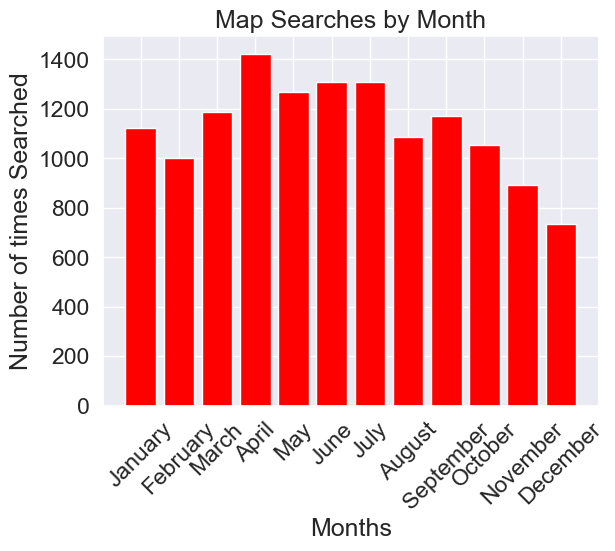

In [65]:
months = list(num_counts.keys())
counts = list(num_counts.values())

plt.bar(months, counts, color='red')
plt.xlabel("Months")
plt.ylabel("Number of times Searched")
plt.title("Map Searches by Month")
plt.xticks(rotation=45)
plt.show()